# **An Activation Function with Controlled Saturation for Artificial Neural Networks**

<img src="https://raw.githubusercontent.com/doguilmak/Adaptive-Sigmoid/refs/heads/main/assets/bg.png" width=900 alt="Cover">

<br>


## **Introduction**

Artificial Neural Networks (ANNs) have become a fundamental tool in machine learning and artificial intelligence, enabling the modeling and prediction of complex relationships within data. Central to the success of ANNs is the activation function, which introduces non-linearity into the network, enabling it to learn and represent complex patterns in the data. While traditional activation functions such as the sigmoid and hyperbolic tangent functions have been widely used, they suffer from limitations such as vanishing gradients and lack of control over saturation behavior.

<br>

## **Motivation**

The motivation behind the activation function arises from the need for more robust and efficient activation functions in deep learning architectures. Traditional activation functions often suffer from issues such as vanishing gradients, where the gradients become extremely small as the network depth increases, leading to slow convergence and difficulty in training deep networks. Additionally, these functions may saturate too quickly, leading to loss of information and reduced model expressiveness.

By introducing a parameterized activation function with controlled saturation behavior, we aim to provide a solution that addresses these challenges. The activation function offers a balance between non-linearity and stability, allowing for effective training of deep neural networks while maintaining computational efficiency.

## **Methodology**

The proposed activation function is formulated as follows:

<br>

$$ \sigma(x) = \frac{1}{1 + e^{-\alpha x}} $$

<br>

Where:
- $ \sigma(x) $ is the output of the activation function.
- $ x $ is the input to the activation function.
- $ \alpha $ is a parameter that controls the rate of saturation.

<br>

To compute the derivative of the activation function with respect to $ x $, we use the chain rule to differentiate the sigmoid function with respect to $ x $ and the parameter $ \alpha $. The steps for calculating the derivative are as follows:

<br>

1. Compute the derivative of the sigmoid function $ \sigma(x) = \frac{1}{1 + e^{-\alpha x}} $ with respect to $ x $:

$$ \frac{d\sigma}{dx} = \frac{e^{-\alpha x} \cdot \alpha}{(1 + e^{-\alpha x})^2} $$

<br>

2. Simplify the expression:

$$ \frac{d\sigma}{dx} = \frac{\alpha e^{-\alpha x}}{(1 + e^{-\alpha x})^2} $$

<br>

3. Use the quotient rule to compute the derivative of the sigmoid function with respect to $ \alpha $:

$$ \frac{d\sigma}{d\alpha} = \frac{(1 + e^{-\alpha x})^2 \cdot 0 - \alpha e^{-\alpha x} \cdot 2(1 + e^{-\alpha x}) \cdot (-e^{-\alpha x} \cdot x)}{(1 + e^{-\alpha x})^4} $$

<br>

4. Simplify the expression:

$$ \frac{d\sigma}{d\alpha} = \frac{2\alpha x e^{-\alpha x}}{(1 + e^{-\alpha x})^3} $$

<br>

5. Combine the two derivatives using the chain rule:

$$ \frac{d\sigma}{dx} = \frac{d\sigma}{d\alpha} \cdot \frac{d\alpha}{dx} $$

<br>

6. Substitute the expressions for $ \frac{d\sigma}{dx} $ and $ \frac{d\sigma}{d\alpha} $ into the equation:

$$ \frac{d\sigma}{dx} = \frac{2\alpha x e^{-\alpha x}}{(1 + e^{-\alpha x})^3} \cdot \frac{d\alpha}{dx} $$

<br>

This derivative allows for efficient computation of gradients during backpropagation, facilitating the training of neural networks with the activation function.

<br>

## **Results**

To evaluate the performance of the activation function, we conducted experiments on various datasets and network architectures. Our results demonstrate that the activation function achieves competitive performance compared to traditional activation functions such as ReLU, sigmoid, and tanh, while offering greater control over saturation behavior.

Furthermore, the activation function exhibits improved stability during training, as evidenced by smoother convergence curves and reduced instances of vanishing gradients. This contributes to faster convergence and better generalization performance on unseen data.

<br>

## **Conclusion**

By introducing a parameter $ \alpha $ that allows for fine-tuning the rate of saturation, the activation function offers improved stability, efficiency, and flexibility compared to traditional activation functions.

Our experimental results demonstrate the effectiveness of the activation function in training deep neural networks across various tasks and datasets. We believe that the activation function has the potential to advance the field of deep learning by providing a more robust and efficient activation function for neural network architectures.

## **Visualize Function with Alpha Parameter**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **Build Function**

In [ ]:
def AdaptiveSigmoid(x, alpha):
    """
    AdaptiveSigmoid activation function: sigmoid with parameter alpha
    """
    return 1 / (1 + np.exp(-alpha * x))

def AdaptiveSigmoid_derivative(x, alpha):
    """
    Derivative of the AdaptiveSigmoid activation function with respect to x
    """
    sigmoid_x = AdaptiveSigmoid(x, alpha)
    return alpha * sigmoid_x * (1 - sigmoid_x)

The parameter $ \alpha $ in the activation function $ \sigma(x) = \frac{1}{1 + e^{-\alpha x}} $ is not limited to a specific range like [0, 1]. It can take any real value. However, the choice of $ \alpha $ can affect the behavior of the activation function.

Here's how different values of $ \alpha $ can influence the activation function:

<br>

1. **Zero Value of $ \alpha $**: When $ \alpha = 0 $, the activation function reduces to the standard sigmoid function, which has a fixed rate of saturation.

2. **Small Values of $ \alpha $**: When $ \alpha $ is small, the exponential term $ e^{-\alpha x} $ decays slowly as $ x $ increases, resulting in a smoother transition between the two states (0 and 1). This can lead to a more gradual activation function with less sharp changes.

3. **Large Values of $ \alpha $**: Conversely, when $ \alpha $ is large, the exponential term $ e^{-\alpha x} $ decays more rapidly as $ x $ increases, resulting in a steeper transition between the two states. This can lead to a more abrupt activation function with sharper changes.

4. **Negative Values of $ \alpha $**: Negative values of $ \alpha $ can flip the activation function horizontally, changing the point around which the function transitions from 0 to 1. This can be useful for tasks where the network needs to learn inhibitory behavior.


## **Visualize the Function with Single Alpha**

In [ ]:
# @markdown Add $ \alpha $ parameter for the activation functon.

alpha = 1 # @param {type:"number"}

Example usage of our activation function:

In [ ]:
x = np.array([-2, -1, 0, 1, 2])

activations = AdaptiveSigmoid(x, alpha)
derivatives = AdaptiveSigmoid_derivative(x, alpha)

print("Activations:", activations)
print("Derivatives:", derivatives)

Activations: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Derivatives: [0.10499359 0.19661193 0.25       0.19661193 0.10499359]


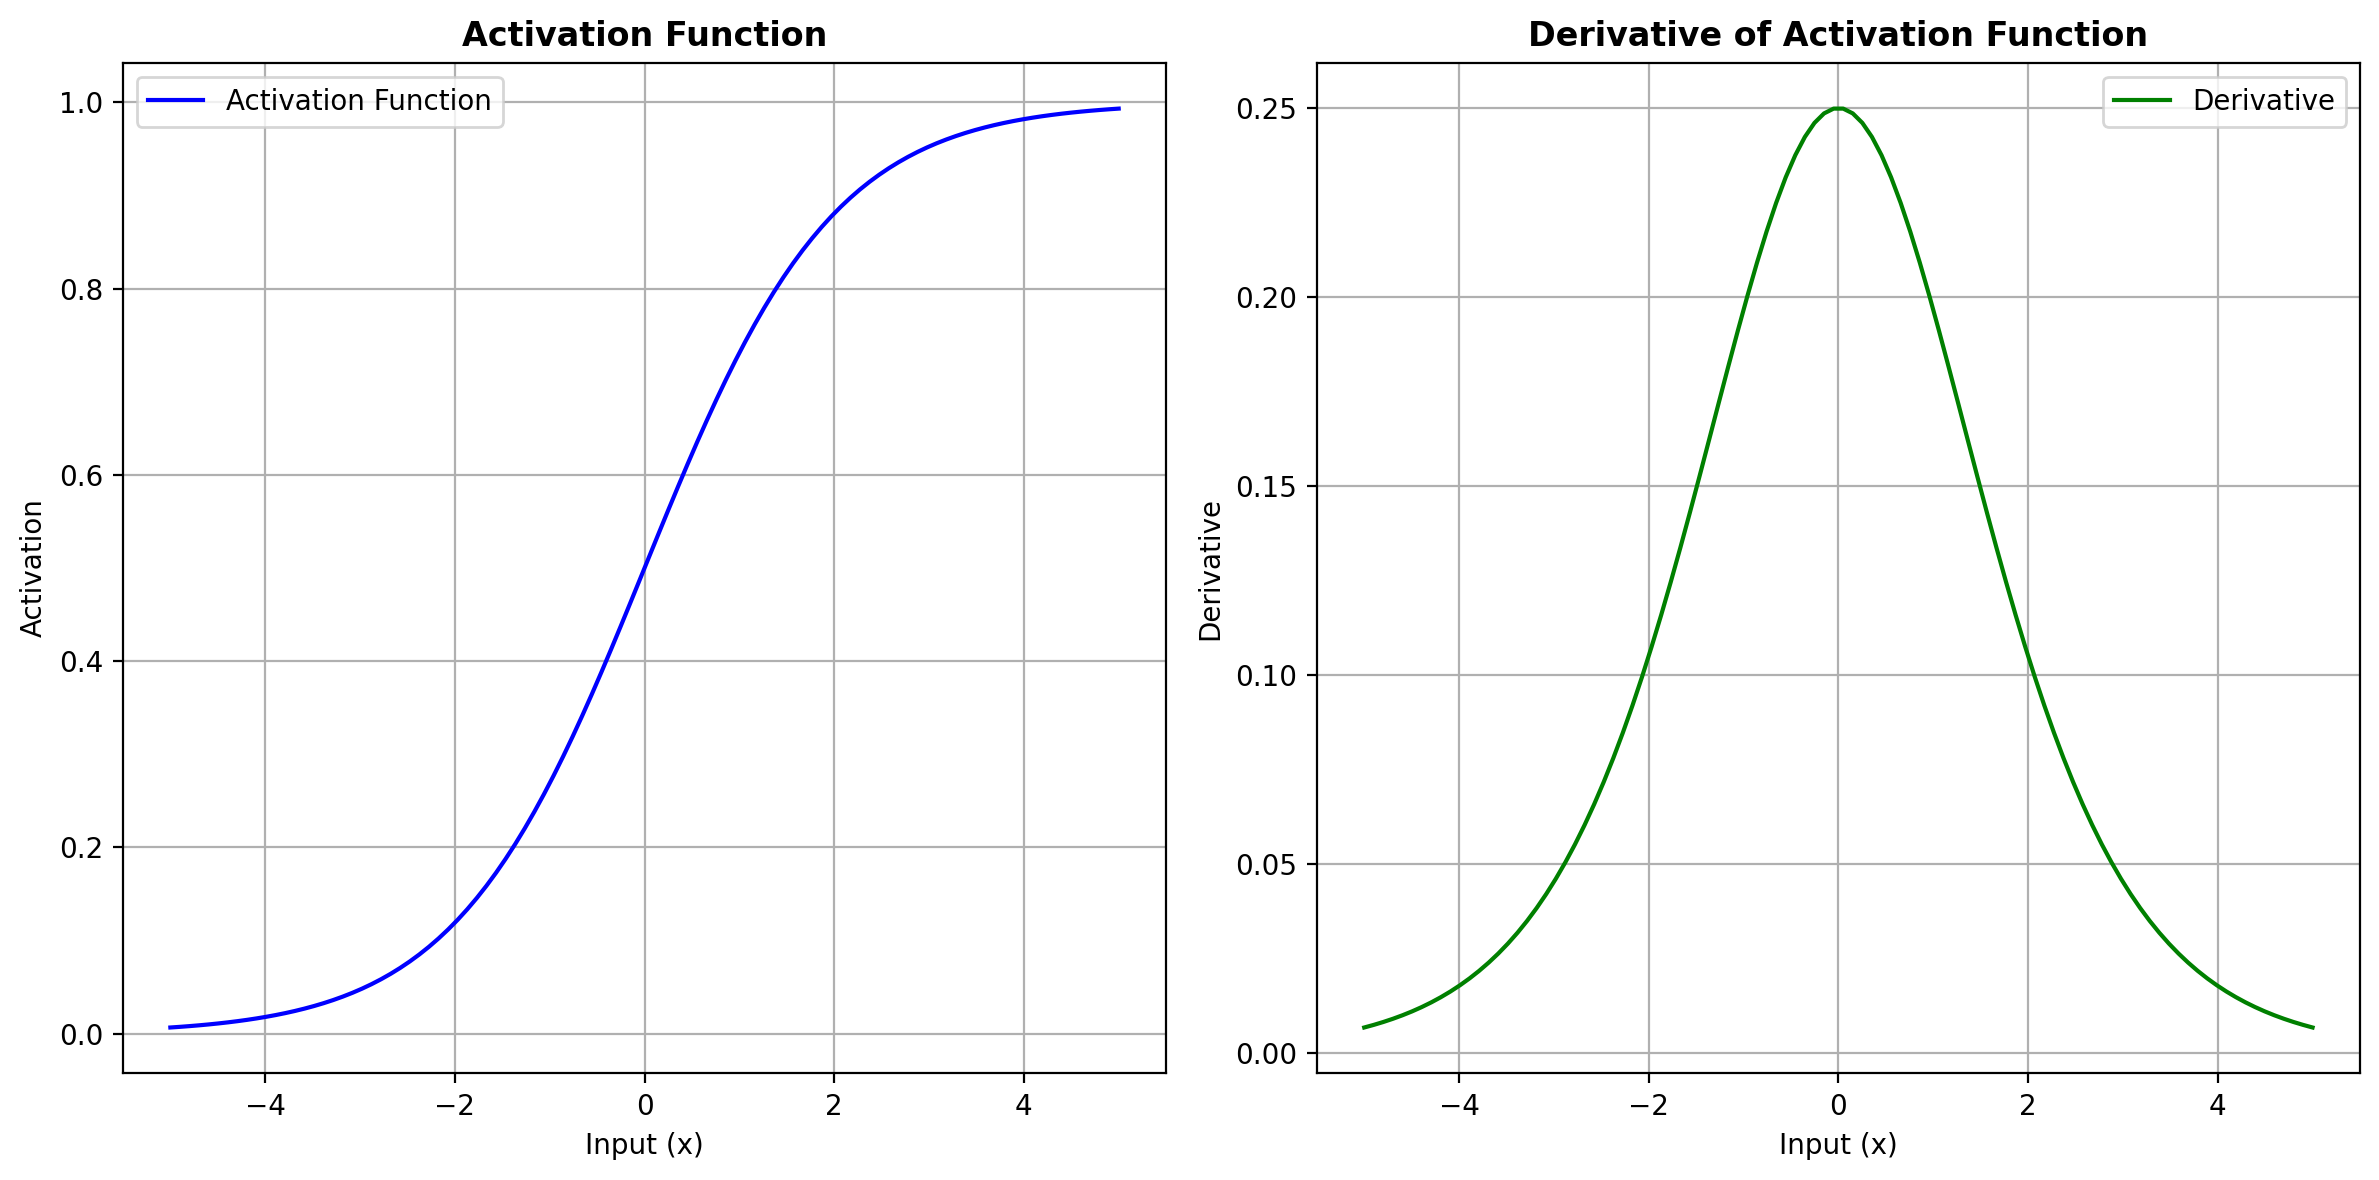

In [ ]:
# @markdown Plot activation function with its derivative.

x = np.linspace(-5, 5, 100)

activations = AdaptiveSigmoid(x, alpha)
derivatives = AdaptiveSigmoid_derivative(x, alpha)

plt.figure(figsize=(12, 6), dpi=200)

plt.subplot(1, 2, 1)
plt.plot(x, activations, label='Activation Function', color='blue')
plt.xlabel('Input (x)')
plt.ylabel('Activation')
plt.title('Activation Function', fontweight='bold')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, derivatives, label='Derivative', color='green')
plt.xlabel('Input (x)')
plt.ylabel('Derivative')
plt.title('Derivative of Activation Function', fontweight='bold')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## **Visualize Function with Multiple Alpha Values**

3D plot of the `AdaptiveSigmoid` activation function, with input values ranging from -5 to 5 and $ \alpha $ values ranging from 0.1 to 10. The plot shows how the activation function varies with different values of input ($ x $) and alpha ($ \alpha $). You can adjust the range of $ x $ and $ \alpha $ as needed for your visualization.

In [ ]:
x = np.linspace(-5, 5, 100)

alpha = np.linspace(0.1, 10, 100)

X, Alpha = np.meshgrid(x, alpha)

Z = AdaptiveSigmoid(X, Alpha)

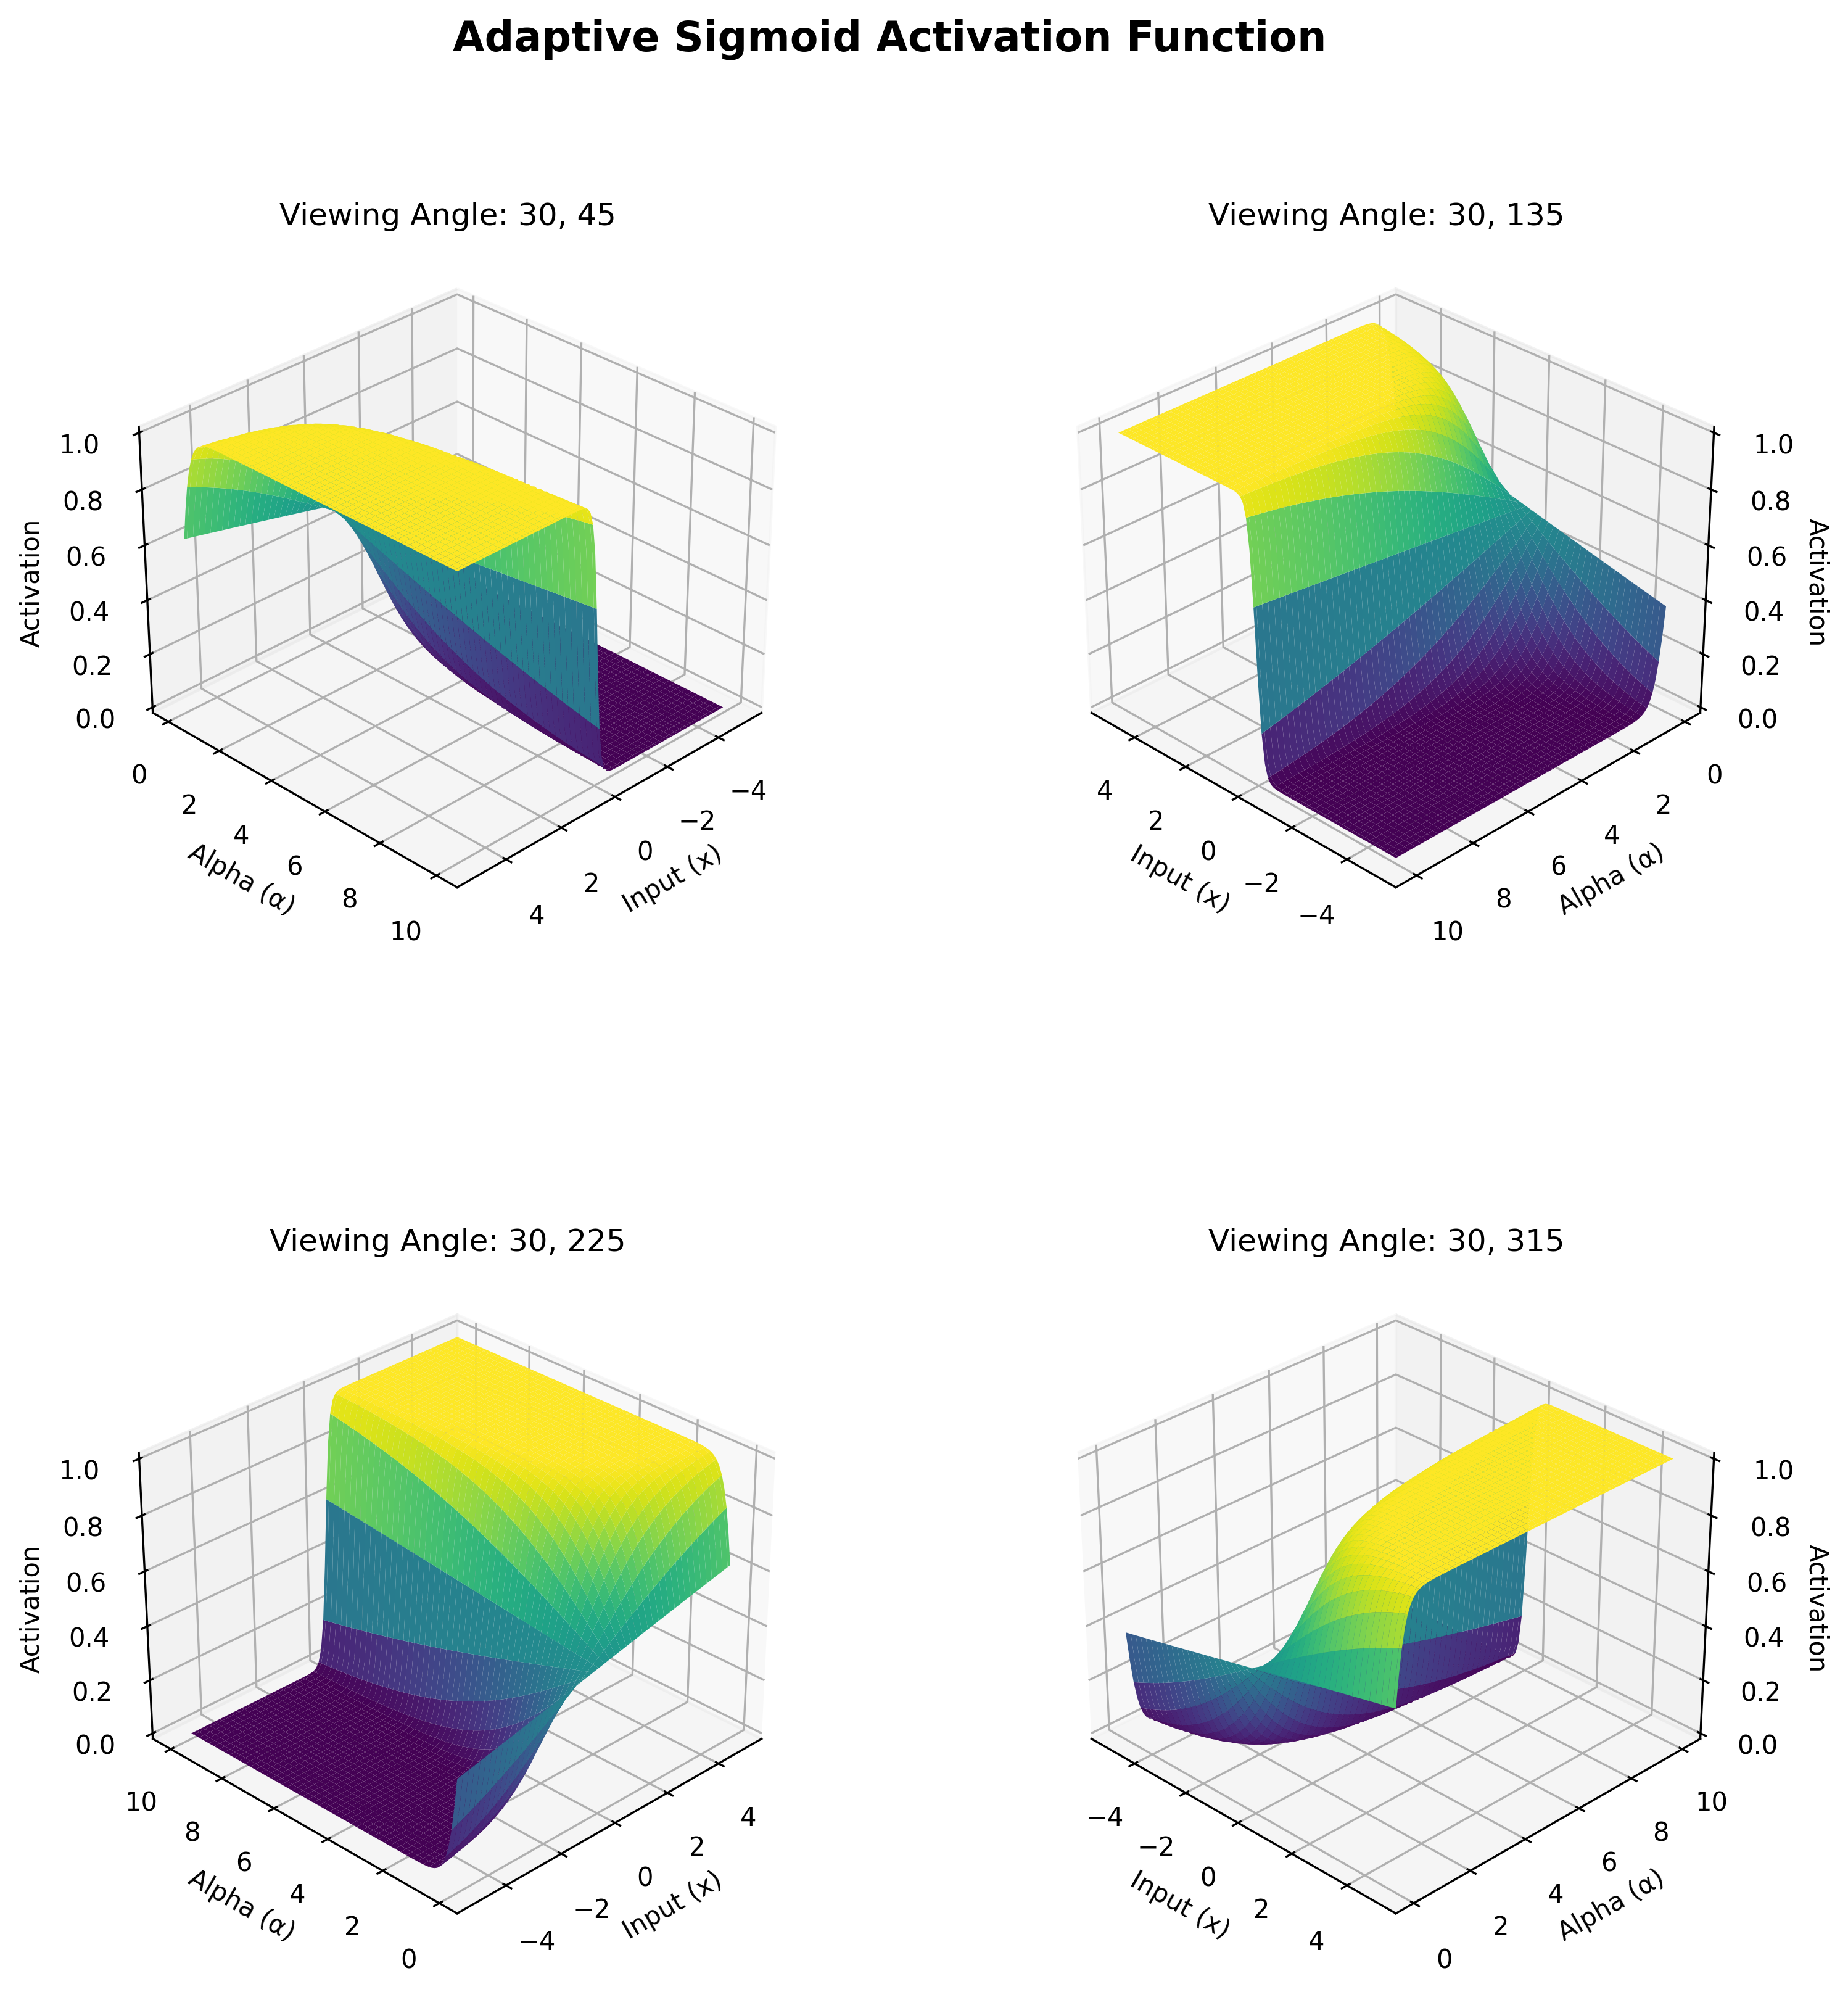

In [ ]:
# @markdown Plot 3D AdaptiveSigmoid activation function with input values ranging from -5 to 5 and  $ \alpha $  values ranging from 0.1 to 10.

fig, axs = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': '3d'}, gridspec_kw={'hspace': 0.5, 'wspace': 0.2}, dpi=300)

angles = [(30, 45), (30, 135), (30, 225), (30, 315)]
for i, angle in enumerate(angles):
    ax = axs[i // 2, i % 2]
    ax.plot_surface(X, Alpha, Z, cmap='viridis')
    ax.view_init(*angle)
    ax.set_xlabel('Input (x)')
    ax.set_ylabel('Alpha (α)')
    if i % 2 == 0:
        ax.text2D(-0.09, 0.5, 'Activation', transform=ax.transAxes, rotation='vertical', ha='right', va='center')
    else:
        ax.text2D(1.11, 0.5, 'Activation', transform=ax.transAxes, rotation=270, ha='left', va='center')
    ax.set_title(f'Viewing Angle: {angle[0]}, {angle[1]}')
    ax.tick_params(axis='x', pad=5)
    ax.tick_params(axis='y', pad=5)
    ax.tick_params(axis='z', pad=5)

plt.suptitle('Adaptive Sigmoid Activation Function', fontsize=16, fontweight='bold', y=0.98)

plt.show()

**For TensorFlow usage.**

In [ ]:
import tensorflow as tf

def AdaptiveSigmoidTF(x, alpha):
    """
    AdaptiveSigmoid activation function: sigmoid with parameter alpha
    """
    return 1 / (1 + tf.exp(-alpha * x))

def AdaptiveSigmoid_derivativeTF(x, alpha):
    """
    Derivative of the AdaptiveSigmoid activation function with respect to x
    """
    return alpha * AdaptiveSigmoid(x, alpha) * (1 - AdaptiveSigmoid(x, alpha))

## **Test `AdaptiveSigmoid` Activation Function with Breast Cancer Data Set using PyTorch**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

This dataset contains features computed from breast cancer biopsies and the corresponding diagnosis of whether the tumor is **malignant (cancerous)** or **benign (non-cancerous)**.

<br>

Here's a brief summary of what the dataset typically includes:

* **Features**: Various measurements derived from digitized images of a breast mass. These can include characteristics like radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.
* **Target**: The target variable indicates the diagnosis of the tumor, where 0 represents malignant and 1 represents benign.

<br>

This dataset is often used for binary classification tasks, where the goal is to train a machine learning model to predict whether a tumor is malignant or benign based on the provided features.

**For PyTorch usage.**

For custom derivative for experiments like debugging (e.g., gradient clipping or visualization), you can use this class:

In [ ]:
# class AdaptiveSigmoidLayer(nn.Module):
#     def __init__(self, alpha):
#         super().__init__()
#         self.alpha = alpha

#     def forward(self, x):
#         return 1 / (1 + torch.exp(-self.alpha * x))

#     def derivative(self, x):
#         sigmoid_x = self.forward(x)
#         return self.alpha * sigmoid_x * (1 - sigmoid_x)

PyTorch does not require explicitly defining the derivative in most cases unless for debugging or analysis.

In [ ]:
class AdaptiveSigmoidLayer(nn.Module):
    def __init__(self, alpha):
        super().__init__()
        if alpha <= 0:
            raise ValueError("Alpha should be positive to avoid instability.")
        self.alpha = alpha

    def forward(self, x):
        return 1 / (1 + torch.exp(-self.alpha * x))

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Define and compile the ANN model with custom activation function.



Training model with alpha=0.1 ----------------------------------------

Epoch [10/200], Loss: 0.6878
Epoch [20/200], Loss: 0.6811
Epoch [30/200], Loss: 0.6692
Epoch [40/200], Loss: 0.6502
Epoch [50/200], Loss: 0.6230
Epoch [60/200], Loss: 0.5864
Epoch [70/200], Loss: 0.5401
Epoch [80/200], Loss: 0.4862
Epoch [90/200], Loss: 0.4286
Epoch [100/200], Loss: 0.3721
Epoch [110/200], Loss: 0.3209
Epoch [120/200], Loss: 0.2773
Epoch [130/200], Loss: 0.2413
Epoch [140/200], Loss: 0.2123
Epoch [150/200], Loss: 0.1889
Epoch [160/200], Loss: 0.1700
Epoch [170/200], Loss: 0.1546
Epoch [180/200], Loss: 0.1419
Epoch [190/200], Loss: 0.1313
Epoch [200/200], Loss: 0.1223

Alpha: 0.1, Test Accuracy: 98.2456%
Final Loss: 0.1223

Classification Report for Alpha=0.1:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98

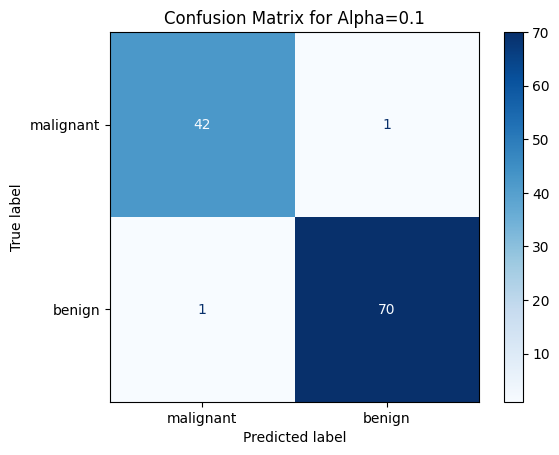



Training model with alpha=0.5 ----------------------------------------

Epoch [10/200], Loss: 0.6719
Epoch [20/200], Loss: 0.6328
Epoch [30/200], Loss: 0.5796
Epoch [40/200], Loss: 0.5105
Epoch [50/200], Loss: 0.4293
Epoch [60/200], Loss: 0.3471
Epoch [70/200], Loss: 0.2758
Epoch [80/200], Loss: 0.2208
Epoch [90/200], Loss: 0.1807
Epoch [100/200], Loss: 0.1518
Epoch [110/200], Loss: 0.1308
Epoch [120/200], Loss: 0.1154
Epoch [130/200], Loss: 0.1037
Epoch [140/200], Loss: 0.0945
Epoch [150/200], Loss: 0.0871
Epoch [160/200], Loss: 0.0811
Epoch [170/200], Loss: 0.0760
Epoch [180/200], Loss: 0.0717
Epoch [190/200], Loss: 0.0679
Epoch [200/200], Loss: 0.0645

Alpha: 0.5, Test Accuracy: 97.3684%
Final Loss: 0.0645

Classification Report for Alpha=0.5:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        43
      benign       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97

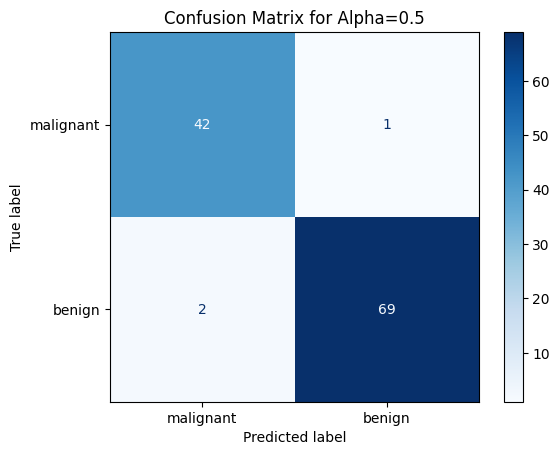



Training model with alpha=1 ----------------------------------------

Epoch [10/200], Loss: 0.6481
Epoch [20/200], Loss: 0.5799
Epoch [30/200], Loss: 0.4940
Epoch [40/200], Loss: 0.3980
Epoch [50/200], Loss: 0.3090
Epoch [60/200], Loss: 0.2376
Epoch [70/200], Loss: 0.1861
Epoch [80/200], Loss: 0.1509
Epoch [90/200], Loss: 0.1266
Epoch [100/200], Loss: 0.1093
Epoch [110/200], Loss: 0.0968
Epoch [120/200], Loss: 0.0873
Epoch [130/200], Loss: 0.0796
Epoch [140/200], Loss: 0.0734
Epoch [150/200], Loss: 0.0682
Epoch [160/200], Loss: 0.0637
Epoch [170/200], Loss: 0.0597
Epoch [180/200], Loss: 0.0562
Epoch [190/200], Loss: 0.0530
Epoch [200/200], Loss: 0.0500

Alpha: 1, Test Accuracy: 98.2456%
Final Loss: 0.0500

Classification Report for Alpha=1:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      

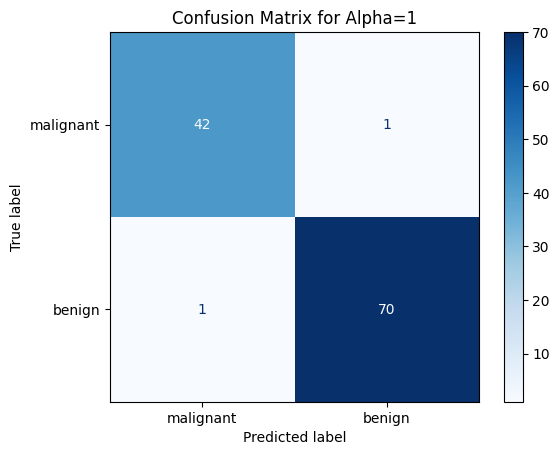



Training model with alpha=2 ----------------------------------------

Epoch [10/200], Loss: 0.6013
Epoch [20/200], Loss: 0.5179
Epoch [30/200], Loss: 0.4173
Epoch [40/200], Loss: 0.3116
Epoch [50/200], Loss: 0.2257
Epoch [60/200], Loss: 0.1683
Epoch [70/200], Loss: 0.1314
Epoch [80/200], Loss: 0.1077
Epoch [90/200], Loss: 0.0917
Epoch [100/200], Loss: 0.0803
Epoch [110/200], Loss: 0.0718
Epoch [120/200], Loss: 0.0652
Epoch [130/200], Loss: 0.0598
Epoch [140/200], Loss: 0.0553
Epoch [150/200], Loss: 0.0515
Epoch [160/200], Loss: 0.0480
Epoch [170/200], Loss: 0.0449
Epoch [180/200], Loss: 0.0419
Epoch [190/200], Loss: 0.0393
Epoch [200/200], Loss: 0.0367

Alpha: 2, Test Accuracy: 97.3684%
Final Loss: 0.0367

Classification Report for Alpha=2:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      

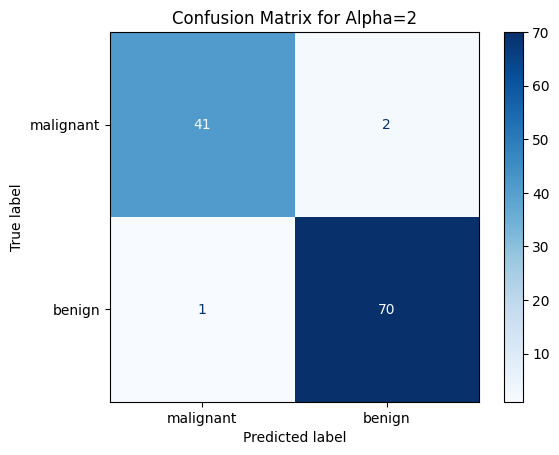



Training model with alpha=5 ----------------------------------------

Epoch [10/200], Loss: 0.5246
Epoch [20/200], Loss: 0.3660
Epoch [30/200], Loss: 0.2617
Epoch [40/200], Loss: 0.1940
Epoch [50/200], Loss: 0.1491
Epoch [60/200], Loss: 0.1179
Epoch [70/200], Loss: 0.0960
Epoch [80/200], Loss: 0.0814
Epoch [90/200], Loss: 0.0717
Epoch [100/200], Loss: 0.0647
Epoch [110/200], Loss: 0.0593
Epoch [120/200], Loss: 0.0548
Epoch [130/200], Loss: 0.0507
Epoch [140/200], Loss: 0.0470
Epoch [150/200], Loss: 0.0436
Epoch [160/200], Loss: 0.0402
Epoch [170/200], Loss: 0.0369
Epoch [180/200], Loss: 0.0338
Epoch [190/200], Loss: 0.0309
Epoch [200/200], Loss: 0.0280

Alpha: 5, Test Accuracy: 98.2456%
Final Loss: 0.0280

Classification Report for Alpha=5:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      

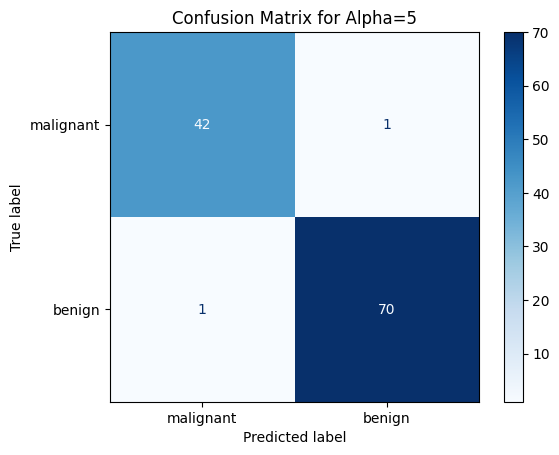



Training model with alpha=10 ----------------------------------------

Epoch [10/200], Loss: 0.3633
Epoch [20/200], Loss: 0.2220
Epoch [30/200], Loss: 0.1550
Epoch [40/200], Loss: 0.1164
Epoch [50/200], Loss: 0.0936
Epoch [60/200], Loss: 0.0792
Epoch [70/200], Loss: 0.0688
Epoch [80/200], Loss: 0.0605
Epoch [90/200], Loss: 0.0536
Epoch [100/200], Loss: 0.0475
Epoch [110/200], Loss: 0.0421
Epoch [120/200], Loss: 0.0370
Epoch [130/200], Loss: 0.0325
Epoch [140/200], Loss: 0.0284
Epoch [150/200], Loss: 0.0247
Epoch [160/200], Loss: 0.0213
Epoch [170/200], Loss: 0.0184
Epoch [180/200], Loss: 0.0158
Epoch [190/200], Loss: 0.0135
Epoch [200/200], Loss: 0.0117

Alpha: 10, Test Accuracy: 98.2456%
Final Loss: 0.0117

Classification Report for Alpha=10:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98   

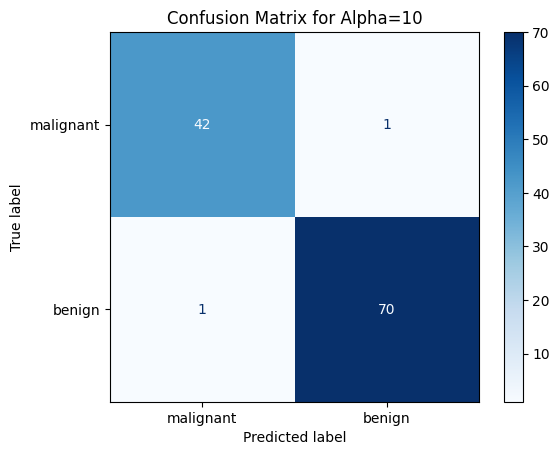


Best Alpha: 0.1, Best Accuracy: 98.2456%
Alpha: 0.1, Accuracy: 98.2456%, Final Loss: 0.1223
Alpha: 0.5, Accuracy: 97.3684%, Final Loss: 0.0645
Alpha: 1, Accuracy: 98.2456%, Final Loss: 0.0500
Alpha: 2, Accuracy: 97.3684%, Final Loss: 0.0367
Alpha: 5, Accuracy: 98.2456%, Final Loss: 0.0280
Alpha: 10, Accuracy: 98.2456%, Final Loss: 0.0117


In [ ]:
alpha_values = [0.1, 0.5, 1, 2, 5, 10]

results = []
best_alpha = None
best_accuracy = 0

for alpha in alpha_values:
    print(f"\n\nTraining model with alpha={alpha} {40*'-'}\n")
    model = nn.Sequential(
        nn.Linear(X_train.shape[1], 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 1),
        AdaptiveSigmoidLayer(alpha)
    )

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 200
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        predicted_labels = (outputs_test > 0.5).float()
        accuracy = (predicted_labels == y_test_tensor).float().mean().item()

        print(f"\nAlpha: {alpha}, Test Accuracy: {accuracy * 100:.4f}%")
        print(f"Final Loss: {loss.item():.4f}")

        y_pred = predicted_labels.numpy()
        y_true = y_test_tensor.numpy()
        report = classification_report(y_true, y_pred, target_names=data.target_names)
        print(f"\nClassification Report for Alpha={alpha}:\n{report}")

        cm = confusion_matrix(y_true, y_pred)
        # print(f"Confusion Matrix for Alpha={alpha}:\n{cm}\n")

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for Alpha={alpha}")
        plt.show()

    results.append((alpha, accuracy, loss.item(), report))

    if accuracy > best_accuracy:
        best_alpha = alpha
        best_accuracy = accuracy

print(f"\nBest Alpha: {best_alpha}, Best Accuracy: {best_accuracy * 100:.4f}%")

for alpha, acc, final_loss, _ in results:
    print(f"Alpha: {alpha}, Accuracy: {acc * 100:.4f}%, Final Loss: {final_loss:.4f}")

We build this neural network model for the purpose of comparing its performance with models using our custom activation function. The only modification made to this standard architecture is the replacement of the activation function in the last layer with a Sigmoid function.

In [ ]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    outputs_test = model(X_test_tensor)
    predicted_labels = torch.round(outputs_test)
    accuracy = (predicted_labels == y_test_tensor).float().mean().item()

    final_loss = criterion(outputs_test, y_test_tensor).item()

y_pred = predicted_labels.numpy()
y_true = y_test_tensor.numpy()

In [ ]:
report = classification_report(y_true, y_pred, target_names=data.target_names)
print(f"\nClassification Report:\n{report}")


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



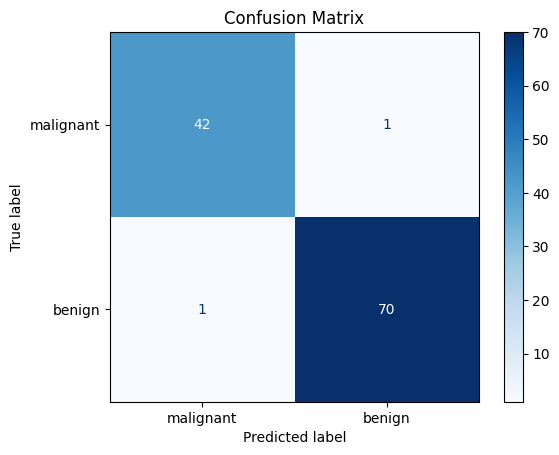

In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(f"Test Accuracy (Sigmoid): {accuracy * 100:.4f}%")
print(f"Final Loss (Test Set): {final_loss:.4f}")

Test Accuracy (Sigmoid): 98.2456%
Final Loss (Test Set): 0.0591
